# Activity - Week 4

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [48]:
Telco= pd.read_csv('Telco-Customer-Churn.csv')

In [49]:
Telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [50]:
Telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We could find that there is no null columns

## Compare churn count with respect to gender

Text(0.5, 1.0, 'Churn count with respect to Gender')

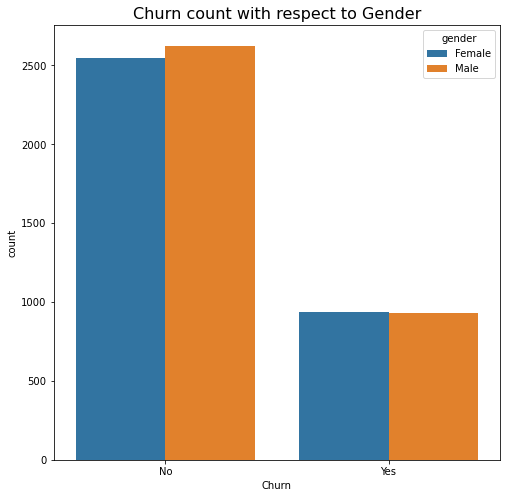

In [51]:
plt.figure(figsize=(8,8))
sns.countplot(x ='Churn', data = Telco, hue='gender')
plt.title('Churn count with respect to Gender', fontsize=16)

Churn count for 'No' is higher than for Churn count for 'Yes' for both Gender (Male and Female)

## Find out how many female senior citizens there in the dataset

Female    568
Name: gender, dtype: int64

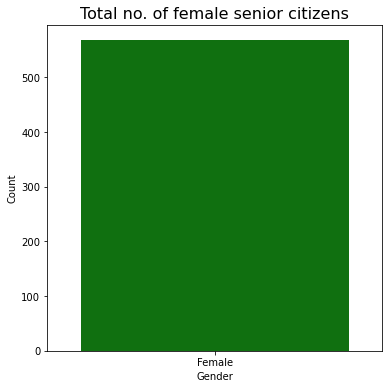

In [58]:
SC=Telco[['gender', 'SeniorCitizen']]
SC
Sen_Citizen=SC[(SC['SeniorCitizen'] == 1) & (SC['gender'] == 'Female')]
plt.figure(figsize=(6,6))
sns.countplot(Sen_Citizen['gender'], color='Green',)
plt.title('Total no. of female senior citizens',fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Count')
Sen_Citizen['gender'].value_counts(dropna = False)

Toatal no. of female senior citizens is 568

## Compare 'tenure' with 'Total Charges'

Text(0, 0.5, 'Total Charges')

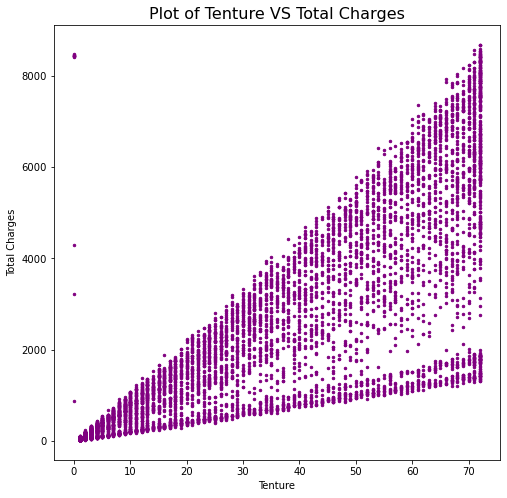

In [66]:
plt.figure(figsize=(8,8))
plt.scatter(Telco['tenure'],Telco['TotalCharges'],s=6, c='Purple',)
plt.title('Plot of Tenture VS Total Charges',fontsize=16)
plt.xlabel('Tenture')
plt.ylabel('Total Charges')

As Tenure increases the Total Charge also increases

## Find out which contract is preferred by the senior citizen.

Text(0.5, 1.0, 'Contracts preferred by Senior Citizens')

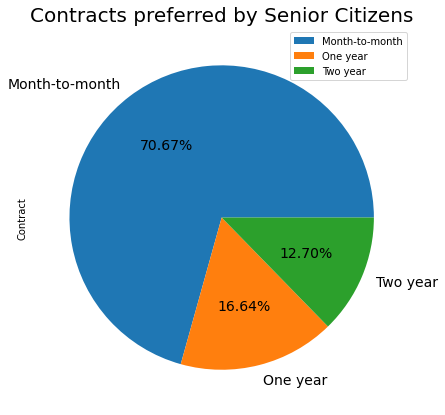

In [131]:
Ct=Telco[(Telco['SeniorCitizen']==1)]
plt.figure(figsize =(10, 7))
Ct.Contract.value_counts(sort=True).plot.pie(fontsize=14,autopct ='%1.2f%%')
plt.legend()
plt.title('Contracts preferred by Senior Citizens',fontsize=20)

About 71% of Senior Citizens was preferred 'Month-to-Month' Contract

## Comment on your finds on Payment Method?

## 1. Payment methods perferred by Senior Citizens

Text(0.5, 1.0, 'Payment method preferred by Senior Citizens')

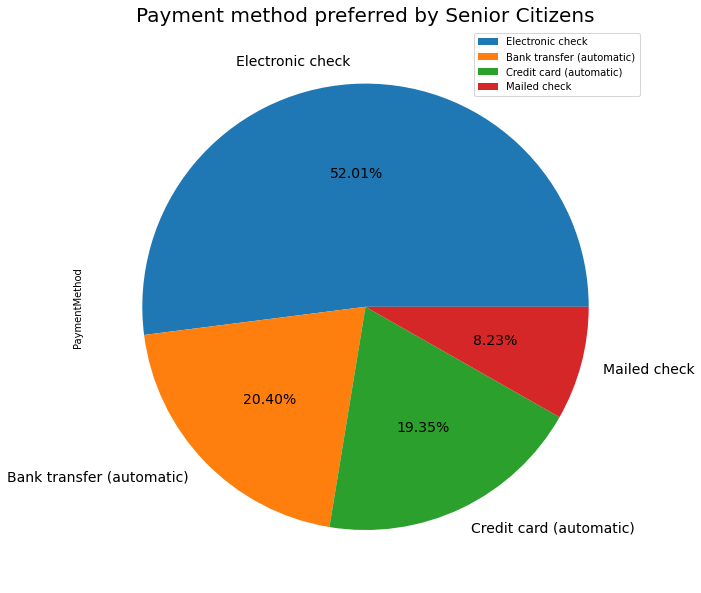

In [139]:
Pm=Telco[(Telco['SeniorCitizen']==1)]
plt.figure(figsize =(10,14))
Pm.PaymentMethod.value_counts(sort=True).plot.pie(fontsize=14,autopct ='%1.2f%%')
plt.legend()
plt.title('Payment method preferred by Senior Citizens',fontsize=20)

About 50% of the senior citizens has choosen Electronic check as the payment method

## 2. Payment Method perferred with respect to Gender

Text(0.5, 1.0, 'Payment method preferred by Customers')

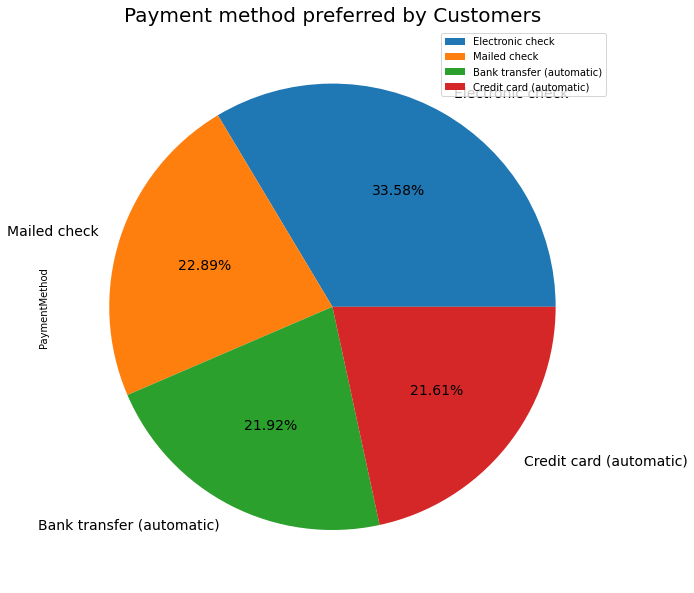

In [154]:
gd=Telco[['gender','PaymentMethod']]
plt.figure(figsize =(10,14))
gd.PaymentMethod.value_counts(sort=True).plot.pie(fontsize=14,autopct ='%1.2f%%')
plt.legend()
plt.title('Payment method preferred by Customers',fontsize=20)

About 30% of the customers has opted for Electronic check. Rest three other methods are almost equally prefered (about 20%)

Text(0.5, 1.0, 'Payment method preferred by Female Customers')

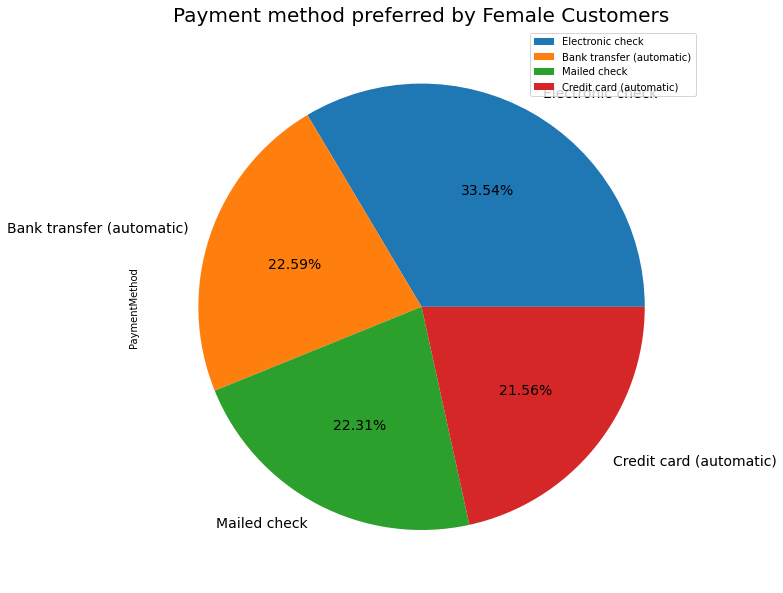

In [156]:
gd=Telco[Telco['gender']=='Female']
plt.figure(figsize =(10,14))
gd.PaymentMethod.value_counts(sort=True).plot.pie(fontsize=14,autopct ='%1.2f%%')
plt.legend()
plt.title('Payment method preferred by Female Customers',fontsize=20)

Text(0.5, 1.0, 'Payment method preferred by Male Customers')

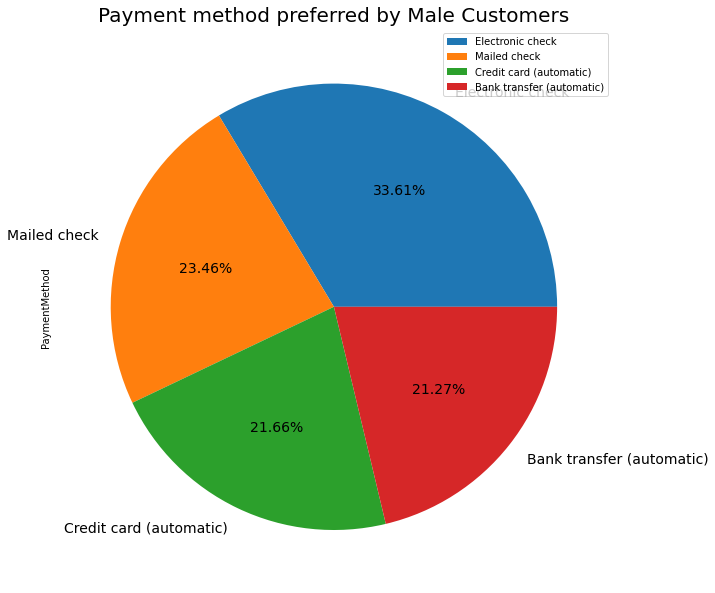

In [153]:
gd=Telco[Telco['gender']=='Male']
plt.figure(figsize =(10,14))
gd.PaymentMethod.value_counts(sort=True).plot.pie(fontsize=14,autopct ='%1.2f%%')
plt.legend()
plt.title('Payment method preferred by Male Customers',fontsize=20)

There is no much difference in the payment method perferred irrespective to the gender. It is almost same percentage as the total customer preferrence